# Analysis Functions

In [1]:
import numpy as np
from nupack import *
from matplotlib import pyplot as plt
import re
import pandas as pd
from matplotlib.patches import Patch


def completion_at_time(data,
                      control_data,
                      time_list_seconds,
                      time_in_seconds,
                      conditions,
                      control_conditions,
                      base_line_level,
                      triggered_level,
                      experimental_level,
                      verbose = False):
  data = data
  conditions = conditions
  control_data = control_data
  control_conditions = control_conditions

  def progegate_uncertainty_averaged_stddev(std_dev_list):
    return np.sqrt(sum(s**2 for s in std_dev_list)/(len(std_dev_list)**2))

  def average_last_n_with_std(n, average_series, std_series):
    av = average_series[-n:].mean()
    std = progegate_uncertainty_averaged_stddev(std_series[-n:].values)
    return av, std
  def calculate_completion_level(V, T, B):
    return (float(V) - float(B))/(float(T) - float(B))
  def series_av_and_std(dat, cond, level_name):
    target_columns = cond[level_name]
    dat[target_columns] = dat[target_columns].apply(pd.to_numeric)
    average_by_point = dat[target_columns].mean(axis=1)
    std_by_point = dat[target_columns].std(axis=1)
    return average_by_point, std_by_point

  #Get the x-values in seconds
  x = time_list_seconds
  #Fine the index of the first datapoint greater than time in seconds
  desired_time_index = min([i for i, time in enumerate(x) if time >= time_in_seconds])
  #Fist calculate baseline average and uncertainty at LAST AVAILABLE 5 DATAPOINTS
  base_line_average, base_line_std = average_last_n_with_std(5, *series_av_and_std(control_data, control_conditions, base_line_level))
  #Next calculate the triggering average and uncerainty at LAST 5 AVAILABLE DATAPOINTS
  triggered_average, triggered_std = average_last_n_with_std(5, *series_av_and_std(control_data, control_conditions, triggered_level))
  completion_levels = []
  for l_name in conditions[experimental_level]:
    completion_levels += [calculate_completion_level(data[l_name][desired_time_index], triggered_average, base_line_average)]

  if verbose:
    print(f"{experimental_level} : {np.average(completion_levels)} +/- {np.std(completion_levels)}")
  return np.average(completion_levels), np.std(completion_levels)

def timeToSec(time):
    pc = re.split(':',time)
    return int(pc[0])*3600 + int(pc[1])*60 + int(pc[2])


# Importing data

In [2]:
nat_noinc = pd.read_csv('UW_Multiiso_NoInc.csv')
conditions_nat_noinc = {'control' : ['E3', 'F3', 'G3'],
'baseline' : ['E2', 'F2', 'G2'],
'N50_25uM' : ['E5', 'F5', 'G5']}
offset_nat_noinc = 140

nn1_noinc = pd.read_csv('UW_Multiiso_NoInc.csv')
conditions_nn1_noinc = {'control' : ['E7', 'F7', 'G7'],
'baseline' : ['E6', 'F6', 'G6'],
'N50_25uM' : ['E9', 'F9', 'G9']}
offset_nn1_noinc = 140



nn2v1_noinc = pd.read_csv('UW_Multiiso_NoInc.csv')
conditions_nn2v1_noinc = {'control' : ['E11', 'F11', 'G11'],
'baseline' : ['E10', 'F10', 'G10'],
'N50_25uM' : ['E13', 'F13', 'G13']}
offset_nn2v1_noinc = 140


nn2v2_noinc = pd.read_csv('UW_Multiiso_NN2close_NoInc.csv')
conditions_nn2v2_noinc = {'baseline' : ['K2', 'L2', 'M2'],
'control': ['K3', 'L3', 'M3'],
'N50_25uM': ['K4', 'L4', 'M4']}
offset_nn2v2_noinc = 140


nat_trig = pd.read_csv('UW_Multiiso_TrigInc.csv')
conditions_nat_trig = {'control' : ['H3', 'I3', 'J3'],
'baseline' : ['H2', 'I2', 'J2'],
'N50_25uM' : ['H5', 'I5', 'J5']}
offset_nat_trig = 140

nn1_trig = pd.read_csv('UW_Multiiso_TrigInc.csv')
conditions_nn1_trig = {'control' : ['H7', 'I7', 'J7'],
                      'baseline' : ['H6', 'I6', 'J6'],
                      'N50_25uM' : ['H9', 'I9', 'J9']}
offset_nn1_trig = 140


nn2v1_trig = pd.read_csv('UW_Multiiso_TrigInc.csv')
conditions_nn2v1_trig = {'control' : ['H11', 'I11', 'J11'],
                        'baseline' : ['H10', 'I10', 'J10'],
                        'N50_25uM' : ['H13', 'I13', 'J13']}
offset_nn2v1_trig = 140

nn2v2_trig = pd.read_csv('UW_Multiiso_NN2close_TrigInc.csv')

conditions_nn2v2_trig = {'baseline' : ['K5', 'L5', 'M5'],
                          'control': ['K6','L6', 'M6',],
                          'N50_25uM': ['K8', 'L8', 'M8']}
offset_nn2v2_trig = 170


# Processing Data

In [3]:
time_points = np.array([6])*3600


both_no_inc = []
both_trig_inc = []
for time_point in time_points:
  t = [offset_nat_noinc + timeToSec(i) for i in list(nat_noinc['Time'].values)]
  nat_noinc_N50_25uM = completion_at_time(nat_noinc, nat_noinc, t, time_point, conditions_nat_noinc, conditions_nat_noinc,'baseline', 'control', 'N50_25uM', verbose = False)

  t = [offset_nn1_noinc + timeToSec(i) for i in list(nn1_noinc['Time'].values)]
  nn1_noinc_N50_25uM = completion_at_time(nn1_noinc, nn1_noinc, t, time_point, conditions_nn1_noinc, conditions_nn1_noinc,'baseline', 'control', 'N50_25uM', verbose = False)

  t = [offset_nn2v1_noinc + timeToSec(i) for i in list(nn2v1_noinc['Time'].values)]
  nn2v1_noinc_N50_25uM = completion_at_time(nn2v1_noinc, nn2v1_noinc, t, time_point, conditions_nn2v1_noinc, conditions_nn2v1_noinc,'baseline', 'control', 'N50_25uM', verbose = False)

  t = [offset_nn2v2_noinc + timeToSec(i) for i in list(nn2v2_noinc['Time'].values)]
  nn2v2_noinc_N50_25uM = completion_at_time(nn2v2_noinc, nn2v2_noinc, t, time_point, conditions_nn2v2_noinc, conditions_nn2v2_noinc,'baseline', 'control', 'N50_25uM', verbose = False)

  t = [offset_nat_trig + timeToSec(i) for i in list(nat_trig['Time'].values)]
  nat_trig_N50_25uM = completion_at_time(nat_trig, nat_trig, t, time_point, conditions_nat_trig, conditions_nat_trig,'baseline', 'control', 'N50_25uM', verbose = False)

  t = [offset_nn1_trig + timeToSec(i) for i in list(nn1_trig['Time'].values)]
  nn1_trig_N50_25uM = completion_at_time(nn1_trig, nn1_trig, t, time_point, conditions_nn1_trig, conditions_nn1_trig,'baseline', 'control', 'N50_25uM', verbose = False)

  t = [offset_nn2v1_trig + timeToSec(i) for i in list(nn2v1_trig['Time'].values)]
  nn2v1_trig_N50_25uM = completion_at_time(nn2v1_trig, nn2v1_trig, t, time_point, conditions_nn2v1_trig, conditions_nn2v1_trig,'baseline', 'control', 'N50_25uM', verbose = False)

  t = [offset_nn2v2_trig + timeToSec(i) for i in list(nn2v2_trig['Time'].values)]
  nn2v2_trig_N50_25uM = completion_at_time(nn2v2_trig, nn2v2_trig, t, time_point, conditions_nn2v2_trig, conditions_nn2v2_trig,'baseline', 'control', 'N50_25uM', verbose = False)


  both_no_inc += [[nat_noinc_N50_25uM, nn1_noinc_N50_25uM, nn2v2_noinc_N50_25uM, nn2v1_noinc_N50_25uM]]


  both_trig_inc += [[nat_trig_N50_25uM, nn1_trig_N50_25uM, nn2v2_trig_N50_25uM, nn2v1_trig_N50_25uM]]



# Plotting results

TypeError: 'Axes' object is not iterable

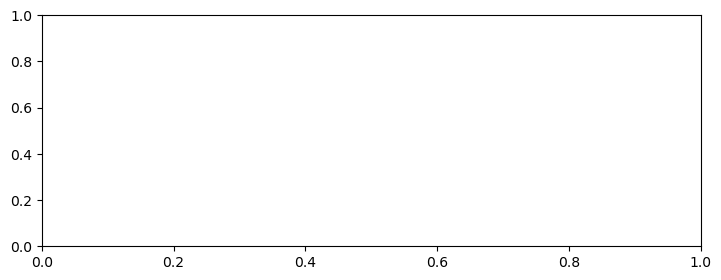

In [4]:
import matplotlib.pyplot as plt
import numpy as np

color_scheme = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd',
                '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']

x_labels = ['0 isoC', '1 isoC', '2 isoC\n(close)', '2 isoC\n(far)']
x = np.arange(len(x_labels))
bar_width = 0.35

fig, ax = plt.subplots(1, len(time_points), figsize=(8.5, 3), sharey=True)

for i, a in enumerate(ax):
    no_inc = [e[0] for e in both_no_inc[i]]
    e_no_inc = [e[1] for e in both_no_inc[i]]
    trig_inc = [e[0] for e in both_trig_inc[i]]
    e_trig_inc = [e[1] for e in both_trig_inc[i]]

    a.bar(x - bar_width/2, no_inc, bar_width, yerr=e_no_inc, color=color_scheme[2],
          label='No trigger', capsize=5)
    a.bar(x + bar_width/2, trig_inc, bar_width, yerr=e_trig_inc, color=color_scheme[3],
          label='Triggered', capsize=5)

    a.set_xticks(x)
    a.set_xticklabels(x_labels, fontsize=9)
    a.set_title(f"Completion at {time_points[i]/3600:.1f} h", fontsize=10)
    a.set_ylim(0, 1)

# Shared y-axis label only on the first subplot
ax[0].set_ylabel('Fractional Completion', fontsize=11)

# Optional legend in last subplot only (or move to fig legend if preferred)
ax[-1].legend(fontsize=8, frameon=False)

plt.tight_layout()
#plt.savefig("NAR_MultiIso_barplot.svg", dpi=400)
plt.show()


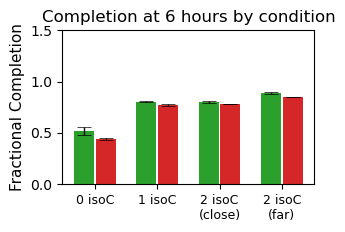

Condition 0 isoC: t-statistic = 3.244, p-value = 0.2988
Condition 1 isoC: t-statistic = 5.497, p-value = 0.0216
Condition 2 isoC
(close): t-statistic = 2.418, p-value = 0.4498
Condition 2 isoC
(far): t-statistic = 4.984, p-value = 0.1324

Conditions 0 isoC vs 1 isoC: t-statistic = -26.446, p-value = 0.0000
Conditions 1 isoC vs 2 isoC
(far): t-statistic = -19.157, p-value = 0.0000
Conditions 1 isoC vs 2 isoC
(close): t-statistic = -0.886, p-value = 1.0000


In [10]:
color_scheme = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd',
                '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']

x_labels = ['0 isoC', '1 isoC', '2 isoC\n(close)', '2 isoC\n(far)']
x = np.arange(len(x_labels))
bar_width = 0.35

fig, ax = plt.subplots(figsize=(3.25, 2))

n_timepoints = len(time_points)
offset_scale = 0.00  # slight horizontal wiggle to avoid full occlusion

error_params = dict(ecolor='black', lw=1, capsize=5, capthick= 0.5)

hatches = [None, "/"]
for i in range(n_timepoints-1, -1, -1):
    alpha_val = 1.0
    width_adj = bar_width * 0.92

    # Apply subpixel offset so layers peek out
    offset = (i - (n_timepoints - 1) / 2) * offset_scale

    no_inc = np.array([v[0] for v in both_no_inc[i]])
    e_no_inc = np.array([v[1] for v in both_no_inc[i]])
    trig_inc = np.array([v[0] for v in both_trig_inc[i]])
    e_trig_inc = np.array([v[1] for v in both_trig_inc[i]])

    # Draw No Trigger (left)
    ax.bar(x - bar_width/2 + offset, no_inc, width_adj, yerr=e_no_inc,
           color=color_scheme[2], alpha=alpha_val, hatch = hatches[i], error_kw=error_params)

    # Draw Triggered (right)
    ax.bar(x + bar_width/2 + offset, trig_inc, width_adj, yerr=e_trig_inc,
           color=color_scheme[3], alpha=alpha_val, hatch = hatches[i], error_kw=error_params)

# X and Y axis formatting
ax.set_xticks(x)
ax.set_xticklabels(x_labels, fontsize=9)
ax.set_ylim(0, 1.5)
ax.set_ylabel("Fractional Completion", fontsize=11)
ax.set_title("Completion at 6 hours by condition", fontsize=12)



plt.savefig("NAR_MultiIso.svg", dpi=400)
plt.show()

# t-tests between no trigger and triggered for each condition at 6 hours
from scipy.stats import ttest_ind_from_stats
for cond_idx in range(4):
       no_inc_mean = both_no_inc[0][cond_idx][0]
       no_inc_std = both_no_inc[0][cond_idx][1]
       trig_inc_mean = both_trig_inc[0][cond_idx][0]
       trig_inc_std = both_trig_inc[0][cond_idx][1]
       n = 3  # number of replicates
       t_stat, p_val = ttest_ind_from_stats(no_inc_mean, no_inc_std, n,
                                          trig_inc_mean, trig_inc_std, n,
                                          equal_var=False)
       # applying Bonferroni correction for multiple comparisons (4 conditions)
       p_val *= 4
       print(f"Condition {x_labels[cond_idx]}: t-statistic = {t_stat:.3f}, p-value = {p_val:.4f}")

print()    
# omnibus t-test between:
## 0 isoC averaged across incubations and 1 isoC averaged across incubations
## 1isoC averaged across incubations and 2 isoC (close) averaged across incubations
## 1isoC averaged across incubations and 2 isoC (far) averaged across incubations
for cond_pair in [(0,1), (1,3), (1,2)]:
       cond1_idx = cond_pair[0]
       cond2_idx = cond_pair[1]
       cond1_no_inc_mean = both_no_inc[0][cond1_idx][0]
       cond1_no_inc_std = both_no_inc[0][cond1_idx][1]
       cond1_trig_inc_mean = both_trig_inc[0][cond1_idx][0]
       cond1_trig_inc_std = both_trig_inc[0][cond1_idx][1]

       cond2_no_inc_mean = both_no_inc[0][cond2_idx][0]
       cond2_no_inc_std = both_no_inc[0][cond2_idx][1]
       cond2_trig_inc_mean = both_trig_inc[0][cond2_idx][0]
       cond2_trig_inc_std = both_trig_inc[0][cond2_idx][1]

       n = 3  # number of replicates

       # Combine no trigger and triggered for condition 1
       combined_cond1_mean = (cond1_no_inc_mean + cond1_trig_inc_mean) / 2
       combined_cond1_std = np.sqrt((cond1_no_inc_std**2 + cond1_trig_inc_std**2) / 2)

       # Combine no trigger and triggered for condition 2
       combined_cond2_mean = (cond2_no_inc_mean + cond2_trig_inc_mean) / 2
       combined_cond2_std = np.sqrt((cond2_no_inc_std**2 + cond2_trig_inc_std**2))/2

       t_stat, p_val = ttest_ind_from_stats(combined_cond1_mean, combined_cond1_std, n*2,
                                           combined_cond2_mean, combined_cond2_std, n*2,
                                           equal_var=False)
       #applying Bonferroni correction for multiple comparisons (3 pairs)
       p_val = min(1.0, p_val * 3)
       print(f"Conditions {x_labels[cond1_idx]} vs {x_labels[cond2_idx]}: t-statistic = {t_stat:.3f}, p-value = {p_val:.4f}")